- Grab new songs for genre from spotify -> feasible?
- Run popularity prediction
- Return sample

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('SpotifyFeatures.csv')
print(df.columns)
df.head()

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [23]:
df = df.dropna()
df = df[df.time_signature != "0/4"][df.time_signature != "1/4"]
df = df.sort_values(by="popularity", ascending=False).drop_duplicates('track_id', keep='first')

C:\Users\lukas\AppData\Local\Temp\ipykernel_6016\863828324.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.time_signature != "0/4"][df.time_signature != "1/4"]


In [24]:
key_conversion = {"C": 0, "C#": 1, "D": 2, "D#": 3, "E": 4, "F": 5, "F#": 6, "G": 7, "G#": 8, "A": 9, "A#": 10, "B": 11}
mode_conversion = {"Major": 1, "Minor": 0}
time_signature_conversion = {"3/4": 3, "4/4": 4, "5/4": 5, "6/4": 6, "7/4": 7}

df['key'] = df['key'].map(key_conversion)
df['mode'] = df['mode'].map(mode_conversion)
df['time_signature'] = df['time_signature'].map(time_signature_conversion)

In [25]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "key", "mode", "time_signature"]

In [26]:
df.head()

,acousticness,artist_name,danceability,duration_ms,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence
9027,0.5780,Ariana Grande,0.725,178640,0.321,Dance,0.000000,1,0.0884,-10.744,0,100,0.3230,70.142,4,14msK75pk3pA33pzPVNtBF,7 rings,0.319
86951,0.1630,Post Malone,0.833,149520,0.539,Rap,0.000002,11,0.1010,-7.399,0,99,0.1780,99.947,4,6MWtB6iiXyIwun0YzU6DFP,Wow.,0.385
9026,0.0421,Ariana Grande,0.726,190440,0.554,Dance,0.000000,5,0.1060,-5.290,0,99,0.0917,169.999,4,4kV4N9D1iKVxx1KLvtTpjS,"break up with your girlfriend, i'm bored",0.335
138918,0.1100,Daddy Yankee,0.737,193227,0.860,Reggaeton,0.000002,8,0.0574,-2.652,0,98,0.0593,93.989,4,5w9c2J52mkdntKOmRLeM2m,Con Calma,0.656
107875,0.3230,Pedro Capó,0.826,238200,0.773,Pop,0.000000,11,0.1430,-4.218,0,97,0.0524,126.899,4,5iwz1NiezX7WWjnCgY5TH4,Calma - Remix,0.761


In [30]:
x = df[features].sort_index(axis=1)
y = df["popularity"]

x_mean = x.mean()
x_std = x.std()

x = (x - x.mean()) / x.std()

In [32]:
import pickle

dataframes = {"x_mean": x_mean, "x_std": x_std}
with open('normalization.pkl', 'wb') as f:
    pickle.dump(dataframes, f)


In [33]:
with open('normalization.pkl', 'rb') as f:
    dataframes = pickle.load(f)
x_mean = dataframes["x_mean"]
x_std = dataframes["x_std"]

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
len(x_train), len(x_test)

(139537, 34885)

In [37]:
x_train = x_train[:]
y_train = y_train[:]

x_test = x_test[:]
y_test = y_test[:]

In [38]:
# do a linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
import math

model = LinearRegression()
model.fit(x_train[:1000], y_train[:1000])

y_pred = model.predict(x_test)

print(math.sqrt(mean_squared_error(y_test, y_pred)))

# do a random forest

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train[:1000], y_train[:1000])

y_pred = model.predict(x_test)

print(math.sqrt(mean_squared_error(y_test, y_pred)))

15.739955149061556
15.083334805880128


In [40]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=[len(features)]),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(32),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(16),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(1e-3)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

y_pred = model.predict(x_test)

math.sqrt(mean_squared_error(y_test, y_pred))

Epoch 1/10


c:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4361/4361 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 808.0538 - val_loss: 212.3609
Epoch 2/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 219.9419 - val_loss: 212.3271
Epoch 3/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 219.3571 - val_loss: 211.0280
Epoch 4/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 216.2821 - val_loss: 208.5603
Epoch 5/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 214.8804 - val_loss: 209.3657
Epoch 6/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 211.5105 - val_loss: 206.5955
Epoch 7/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 210.3163 - val_loss: 207.2264
Epoch 8/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 212.6177 - val_loss: 207.4129
Epoch 9/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 211.0694 - val_loss: 207.0383
Epoch 10/10
4361/4361 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 210.5552 - val_loss: 204.9482
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step


14.31601529951197

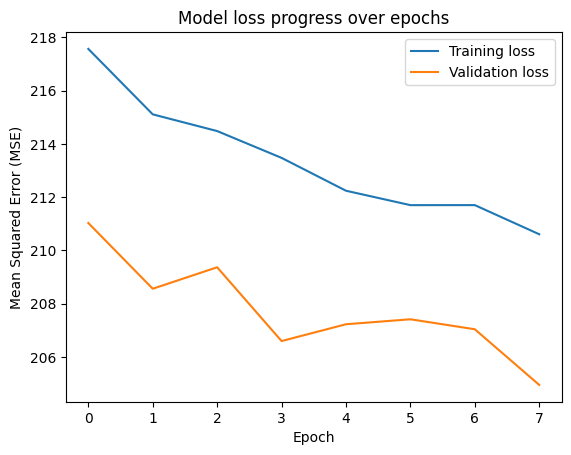

In [42]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])

plt.title('Model loss progress over epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [44]:
save = False
if save: model.save('model.keras')

In [46]:
# read the model
import keras
model = keras.models.load_model('model.keras')

# do a prediction
x = df[features]
y = df["popularity"]

model.predict(x_train[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


c:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


array([[28.841507],
       [32.703907],
       [38.495564],
       [51.48348 ],
       [48.102325],
       [36.90346 ],
       [47.113285],
       [22.243723],
       [44.23259 ],
       [45.291294]], dtype=float32)